# Data Set 3
# Created by: Anthony Arshoun
Here, we will analyze average pollution across several locations around Pittsburgh to determine their relative air qualities. This metric better describes "worstness" than it does "bestness," so each location will receive a detriment to their scores calculated from the first two datasets.

Let's begin with our imports and setup for JupyterHub

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

The Air Quality data at https://data.wprdc.org/dataset/allegheny-county-air-quality/resource/36fb4629-8003-4acc-a1ca-3302778a530d is massive and contains a lot of information that we won't need to use. From the WPRDC website, I filtered the data into valid pollutant measurements in parts per million (ppm). That new dataset must be downloaded slightly differently due to the filtering, so we cannot just use the URL https://data.wprdc.org/dataset/allegheny-county-air-quality/resource/36fb4629-8003-4acc-a1ca-3302778a530d?filters=is_valid%3Atrue%7Cunit%3APPM. Instead, it is downloaded here as a csv file, so that is what we will access.

In [2]:
data = pd.read_csv("Pollutants.csv",index_col = "datetime_est", parse_dates = True)
data

,_id,site,parameter,is_valid,report_value,unit,unit_description,highest_flag,aqs_parameter_category
datetime_est,,,,,,,,,
2021-10-07 15:00:00,5293192,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 11:00:00,5316958,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-07 14:00:00,5293169,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-15 15:00:00,5314718,Avalon,SO2,t,0.035,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 10:00:00,5316891,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
...,...,...,...,...,...,...,...,...,...
2023-11-24 23:00:00,7936589,North Braddock,SO2,t,0.000,PPM,Parts Per Million,NaN,Criteria Pollutants
2023-06-16 12:00:00,7310018,North Braddock,H2S,t,0.000,PPM,Parts Per Million,NaN,NaN
2022-11-19 20:00:00,6372113,North Braddock,H2S,t,0.000,PPM,Parts Per Million,NaN,NaN


Wow! 736,000 rows is a lot of data, but there are both several kinds of pollutants listed and data that goes back to 2016 so it checks out. Let's see how many places are covered with this data.

In [3]:
print(data["site"].unique())

['Avalon' 'Clairton' 'Court House' 'Harrison Township' 'Lawrenceville'
 'Liberty' 'North Braddock']


That's not a lot, especially considering that "Court House" isn't even a neighborhood. But Harrison Township isn't a neighborhood either, it actually contains several neighborhoods. Looks like this data will cover a wide range of places then, as long as we know which neighborhoods belong to these larger areas.

Since there is so much variation both in kinds of pollutants captured and when they were captured in each location, the best plan here is to take a long time average over all the data we have. Each site will have lots of data to average, so we will first filter by site.

In [4]:
mask = data["site"] == "Avalon"
masked = data[mask]
masked

,_id,site,parameter,is_valid,report_value,unit,unit_description,highest_flag,aqs_parameter_category
datetime_est,,,,,,,,,
2021-10-07 15:00:00,5293192,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 11:00:00,5316958,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-07 14:00:00,5293169,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-15 15:00:00,5314718,Avalon,SO2,t,0.035,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 10:00:00,5316891,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
...,...,...,...,...,...,...,...,...,...
2023-09-26 18:00:00,7696462,Avalon,SO2,t,0.062,PPM,Parts Per Million,NaN,Criteria Pollutants
2023-10-10 11:00:00,7752063,Avalon,SO2,t,0.062,PPM,Parts Per Million,NaN,Criteria Pollutants
2024-01-23 03:00:00,8176497,Avalon,H2S,t,-0.035,PPM,Parts Per Million,NaN,NaN


Wait! Look at the third to last row there. It's report value is negative, but that doesn't make sense. We can't have negative amounts of pollution, so we should mask out all negative values just to make sure

In [5]:
negmask = masked["report_value"] >= 0.0
nonegs = masked[negmask]
nonegs

,_id,site,parameter,is_valid,report_value,unit,unit_description,highest_flag,aqs_parameter_category
datetime_est,,,,,,,,,
2021-10-07 15:00:00,5293192,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 11:00:00,5316958,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-07 14:00:00,5293169,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-15 15:00:00,5314718,Avalon,SO2,t,0.035,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 10:00:00,5316891,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
...,...,...,...,...,...,...,...,...,...
2023-10-20 06:00:00,7791743,Avalon,SO2,t,0.062,PPM,Parts Per Million,NaN,Criteria Pollutants
2023-09-26 18:00:00,7696462,Avalon,SO2,t,0.062,PPM,Parts Per Million,NaN,Criteria Pollutants
2023-10-10 11:00:00,7752063,Avalon,SO2,t,0.062,PPM,Parts Per Million,NaN,Criteria Pollutants


That's better. But we still have several different kinds of pollutants, so we'll need to split those up to average them separately. Let's start with SO2.

In [6]:
mask2 = nonegs["parameter"] == "SO2"
masked2 = nonegs[mask2]
masked2

,_id,site,parameter,is_valid,report_value,unit,unit_description,highest_flag,aqs_parameter_category
datetime_est,,,,,,,,,
2021-10-07 15:00:00,5293192,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 11:00:00,5316958,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-07 14:00:00,5293169,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-15 15:00:00,5314718,Avalon,SO2,t,0.035,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 10:00:00,5316891,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
...,...,...,...,...,...,...,...,...,...
2023-10-20 06:00:00,7791743,Avalon,SO2,t,0.062,PPM,Parts Per Million,NaN,Criteria Pollutants
2023-09-26 18:00:00,7696462,Avalon,SO2,t,0.062,PPM,Parts Per Million,NaN,Criteria Pollutants
2023-10-10 11:00:00,7752063,Avalon,SO2,t,0.062,PPM,Parts Per Million,NaN,Criteria Pollutants


Great! Now we can take it's average and start compiling a dataframe pollutant-by-pollutant and site-by-site.

In [7]:
average = masked2["report_value"].mean()
frame = pd.Series({"parameter":"SO2","Avalon":average})
frame

parameter         SO2
Avalon       0.001781
dtype: object

Let's repeat this process for each site and each pollutant within each site, then compile it all into one dataframe.

In [8]:
arr = []
for site in data["site"].unique():
    mask = data["site"] == site
    masked = data[mask]
    negmask = masked["report_value"] >= 0.0
    nonegs = masked[negmask]
    arr2 = []
    arr3 = []
    for poll in nonegs["parameter"].unique():
        mask2 = nonegs["parameter"] == poll
        masked2 = nonegs[mask2]
        arr2.append(masked2["report_value"].mean())
        arr3.append(poll)
    frame = pd.DataFrame({"parameter": arr3, site : arr2})
    frame = frame.transpose()
    frame.columns = frame.loc["parameter"]
    frame.columns.name = ''
    frame = frame.drop(labels = "parameter", axis = 0)
    arr.append(frame)
plsgraph = pd.concat(arr)
plsgraph

,SO2,H2S_SO2,H2S,SO2PPM,OZONE,NO,NO2,NOX,OZONE2,OZONE_B
Avalon,0.001781,0.000498,0.000114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clairton,0.001408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Court House,NaN,NaN,NaN,0.00269,NaN,NaN,NaN,NaN,NaN,NaN
Harrison Township,NaN,NaN,NaN,NaN,0.026216,0.001528,0.005831,0.007789,0.028511,0.023206
Lawrenceville,NaN,NaN,NaN,NaN,0.025524,NaN,NaN,NaN,0.02518,NaN
Liberty,0.003257,0.005839,0.002324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Braddock,0.001452,0.003143,0.001443,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Uh oh, that's a lot of NaN's. We can still graph what we have, but we'll need a better way of scoring each location, since they don't all have the same kinds of pollution.

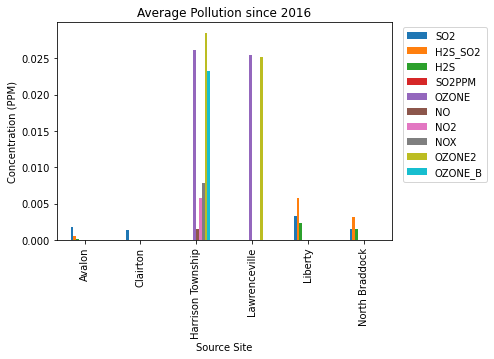

In [9]:
plsgraph = plsgraph.drop(labels = "Court House", axis = 0)
plsgraph.plot(kind = "bar", title = "Average Pollution since 2016", ylabel = "Concentration (PPM)", xlabel = "Source Site")
plt.legend(bbox_to_anchor=(1.3,1))

Honestly, that's not too bad considering all the NaN's. It seems like Harrison Township and Lawrenceville have the most pollution based on this graph, but we aren't taking into account the safety levels of each pollutant. We should be weighting the scores based on how bad each pollutant is to have in the air.

Based on OSHA and NIOSH recommendations, I listed out the different safety levels for each pollutant and a corresponding multiplier to get each value to 100.

|Pollutant|Safe limit (PPM)|Multiplier|
|---------|----------|----------|
|SO2|5|20|
|H2S|20|5|
|NO|25|4|
|Ozone|0.1|1000|
|NOX|1|100|

Since the multiplier for Ozone is so high, any location that has a lot of Ozone will have a pretty high weighted score, but places with more H2S won't have as high a score because it isn't as toxic to breathe.

So let's make a dictionary with the multipliers for all the different measurements based on the table above. In the case of H2S_SO2, which measures both at the same time, we will go with the SO2 multiplier, since it is worse to have in the air.

In [10]:
multipliers = {"SO2":20,
               "H2S":5,
               "H2S_SO2":20,
               "SO2PPM":20,
               "NO":4,
               "OZONE":1000,
               "NO2":100,
               "NOX":100,
               "OZONE2":1000,
               "OZONE_B":1000}

Now we can go row-by-row and generate the weighted score for each site (without the NaN's, of course)

In [11]:
scores = {}
for index, row in plsgraph.iterrows():
    total = 0
    scorable = row.dropna()
    for kind in scorable.index:
        total = total + (scorable[kind] * multipliers[kind])
    scores[index] = total
scores = pd.Series(scores)
scores

Avalon                0.046141
Clairton              0.028160
Harrison Township    79.301553
Lawrenceville        50.703754
Liberty               0.193543
North Braddock        0.099114
dtype: float64

And let's make sure to graph it for good measure.

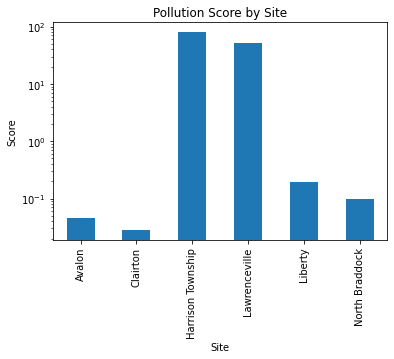

In [12]:
scores.plot(kind="bar",logy = True,ylabel= "Score", xlabel= "Site", title="Pollution Score by Site")

# Conclusion
Based on the score values shown in the graph, historically, Harrison Township and Lawrenceville have the worst air quality out of the locations surveyed. As stated at the start, this submetric will act as a detriment to the submetrics calculated from the other two datasets. Each location will recieve negative scores toward the overall metric that are proportional to the scores calculated here. This is such that locations with the worst air quality will receive the worst (larget) detriment before we conclude on the best neighborhood. Thus, every neighborhood in Harrison Township will receive the largest detriment, followed by every part of Lawrencevillle, and then the other four neighborhoods.